## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics import r2_score

%matplotlib inline


# PLOTTING FUNCTION

In [14]:
def plotting (x_axis,y_axis,x_label,y_label,title):
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title(title, fontdict = font1)
    plt.xlabel(x_label, font1)
    plt.ylabel(y_label, font2)
    plt.plot(x_axis,y_axis)
    plt.scatter(x_axis,y_axis,c="r")

    plt.show()

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

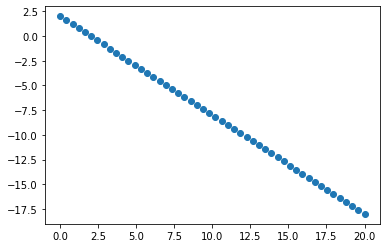

In [4]:
plt.scatter(X,y)
plt.show()

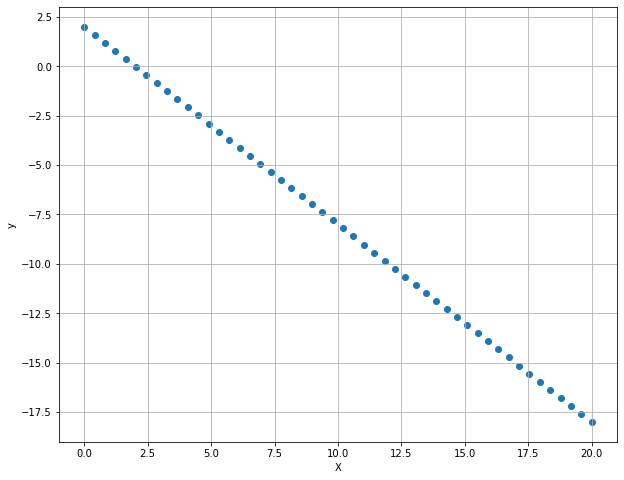

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [8]:
def GD(Input, Target, Learning_rate, iteration):
    # iterate 1000 times to get minimum loss fun 
    theta_0 =0
    theta_1 =0
    lr=Learning_rate
    X = Input
    y = Target
    m = len(X)
    cost_lst = []
    theta0_all=[]
    theta1_all=[]
    h_x_all=[]
    itert=0
    #theta_0_new = theta_0
    #theta_1_new = theta_1
    for i in range (iteration):
        # general function of the model of LR
        h_x = theta_0 + X*theta_1
        # error = predicted -actual
        error = h_x - y
        # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
        MSA = error @ error / (2 * m)
        cost_lst.append(MSA)
        # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
        d_theta_0 = (sum(error)/m) # dj/d theta_0 = segma(error) /m 
        d_theta_1 = (error@X) /m   #dj/d theta_1 = segma(error)*X /m
        # update the weights
        theta_0 = theta_0 - lr*d_theta_0
        theta_1 = theta_1 - lr*d_theta_1
        # append in theta0 and theta1 lists 
        theta0_all.append(theta_0)
        theta1_all.append(theta_1)
        h_x_all.append(h_x)
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)
        if i<20 or i>990:
            print("\n###########iteration==",i,"#######################")
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (cost_lst[i] -cost_lst[i-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break


    return(theta0_all, theta1_all, h_x_all,cost_lst, theta_0, theta_1)
    

In [9]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD(X, y, 0.0005,300)


###########iteration== 0 #######################
j== 49.34693877551021
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
j== 42.96137982976481
gradient_vector [  7.42253061 106.929596  ]
gradient_vector_norm 114.35212661391087

###########iteration== 2 #######################
j== 37.41136489517327
gradient_vector [ 6.88417137 99.69110239]
gradient_vector_norm 106.57527376032097

###########iteration== 3 #######################
j== 32.5875614778742
gradient_vector [ 6.38227377 92.94279097]
gradient_vector_norm 99.3250647364851

###########iteration== 4 #######################
j== 28.39494344557049
gradient_vector [ 5.91436868 86.65146715]
gradient_vector_norm 92.56583582302466

###########iteration== 5 #######################
j== 24.75091901332746
gradient_vector [ 5.47815416 80.78618425]
gradient_vector_norm 86.26433840691693

###########iteration== 6 #######################
j== 21.583703685935138
grad

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
#dr_sol

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [12]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9690064856964327

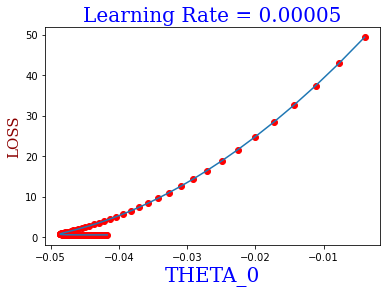

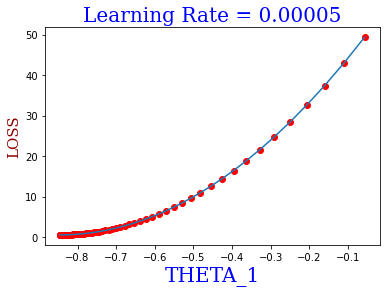

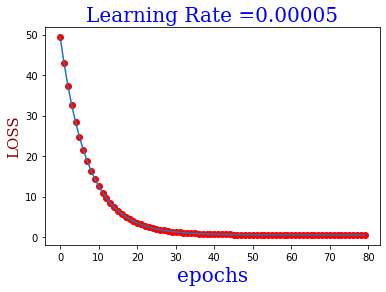

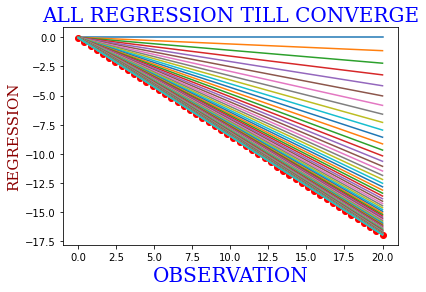

In [15]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate = 0.00005")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate = 0.00005")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate =0.00005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

In [9]:
#DR_SOL

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

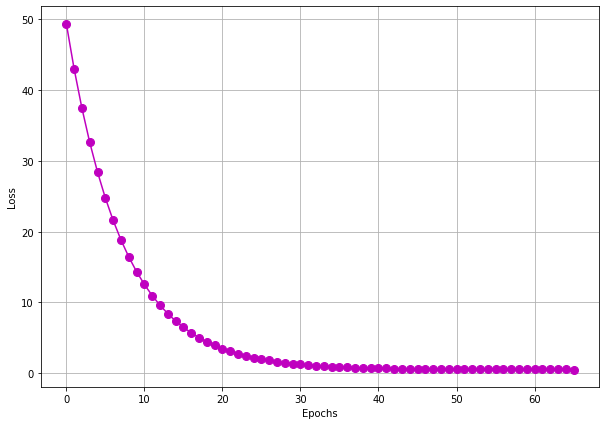

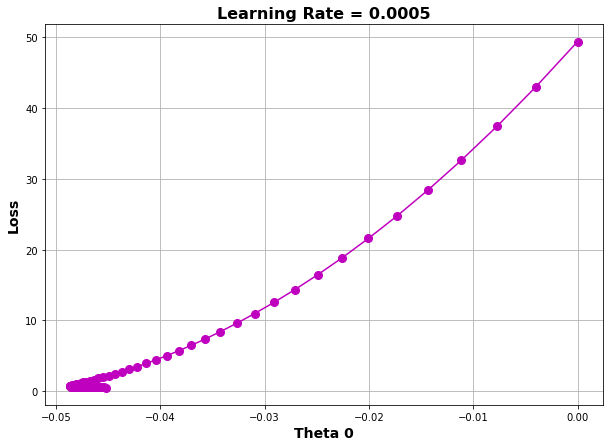

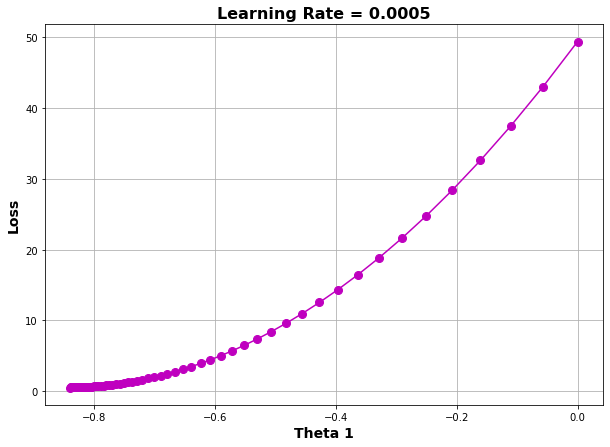

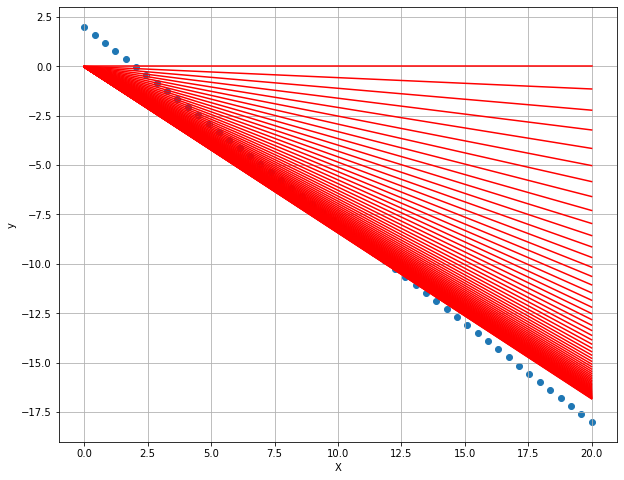

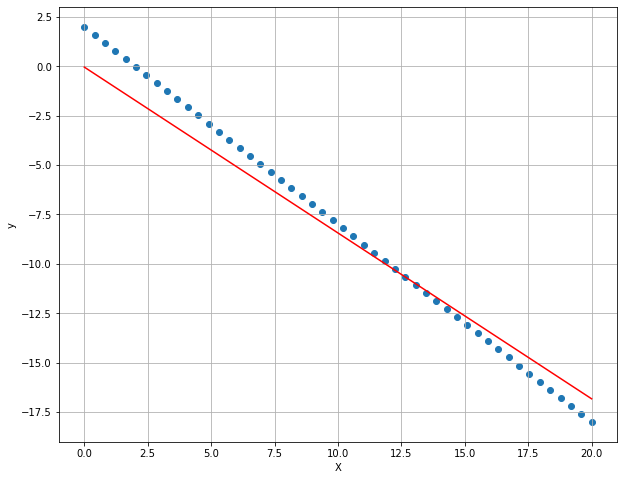

In [11]:
#DR_SOL

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [17]:
def GD_WITH_MOMENTUM(Input, Target, Learning_rate, iteration,gamma):
    # iterate 1000 times to get minimum loss fun 
    theta_0 =0
    theta_1 =0
    v_t0=0 # for momentum ||theta_0
    v_t1=0 # for momentum ||theta_1
    lr=Learning_rate
    X = Input
    y = Target
    m = len(X)
    cost_lst = []
    theta0_all=[]
    theta1_all=[]
    h_x_all=[]
    itert=0
    #theta_0_new = theta_0
    #theta_1_new = theta_1
    for i in range (iteration):
        # general function of the model of LR
        h_x = theta_0 + X*theta_1
        # error = predicted -actual
        error = h_x - y
        # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
        MSA = error @ error / (2 * m)
        cost_lst.append(MSA)
        # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
        d_theta_0 = (sum(error)/m) # dj/d theta_0 = segma(error) /m 
        d_theta_1 = (error@X) /m   #dj/d theta_1 = segma(error)*X /m
        # update the weights
        # use momentum || for theta_0
        v_t0 = gamma*v_t0 + lr*d_theta_0
        theta_0 = theta_0 - v_t0
        # use momentum || for theta_1
        v_t1 = gamma*v_t1 + lr*d_theta_1
        theta_1 = theta_1 - v_t1
        # append in theta0 and theta1 lists 
        theta0_all.append(theta_0)
        theta1_all.append(theta_1)
        h_x_all.append(h_x)
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)
        if i<20 or i>990:
            print("\n###########iteration==",i,"#######################")
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (cost_lst[i] -cost_lst[i-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break


    return(theta0_all, theta1_all, h_x_all,cost_lst, theta_0, theta_1)
    

In [18]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_MOMENTUM(X, y, 0.0005,1000,0.5)


###########iteration== 0 #######################
j== 49.34693877551021
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
j== 42.96137982976481
gradient_vector [  7.42253061 106.929596  ]
gradient_vector_norm 114.35212661391087

###########iteration== 2 #######################
j== 34.595052736755676
gradient_vector [ 6.59543667 95.80896162]
gradient_vector_norm 102.4043982917662

###########iteration== 3 #######################
j== 26.568631719629952
gradient_vector [ 5.69954718 83.76322697]
gradient_vector_norm 89.4627741486178

###########iteration== 4 #######################
j== 19.80786692190886
gradient_vector [ 4.82993652 72.07066499]
gradient_vector_norm 76.9006015142171

###########iteration== 5 #######################
j== 14.499412105758672
gradient_vector [ 4.0323629  61.34649566]
gradient_vector_norm 65.37885855834773

###########iteration== 6 #######################
j== 10.504813724795602
gr

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [13]:
#dr_sol

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [19]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9688911201211077

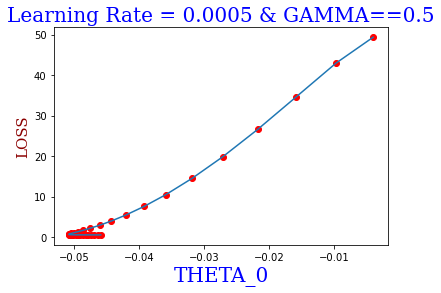

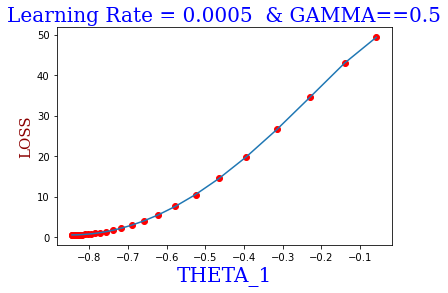

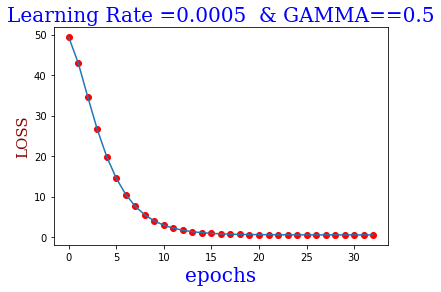

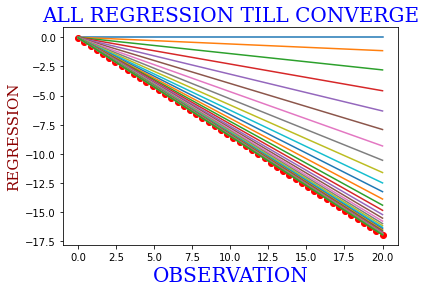

In [21]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0005 & GAMMA==0.5")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005  & GAMMA==0.5")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate =0.0005  & GAMMA==0.5")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   


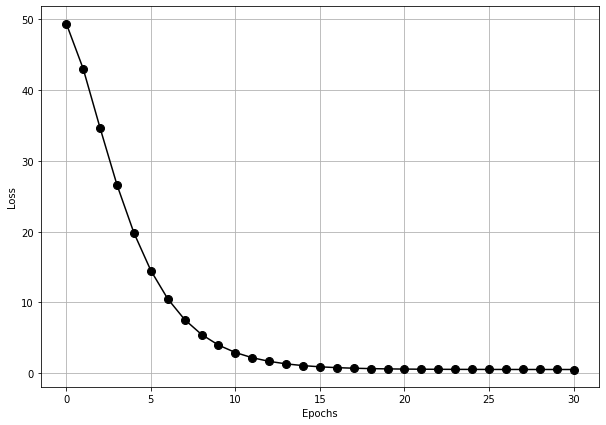

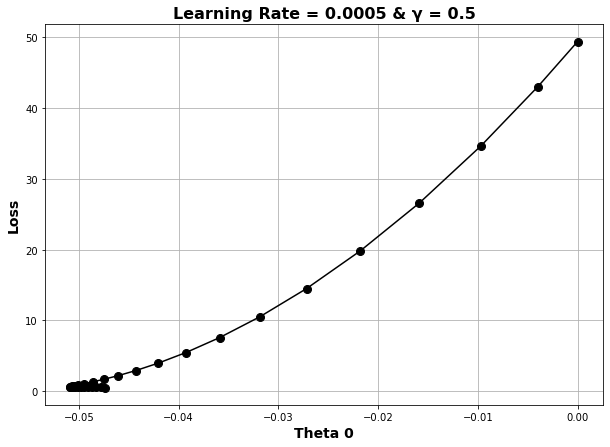

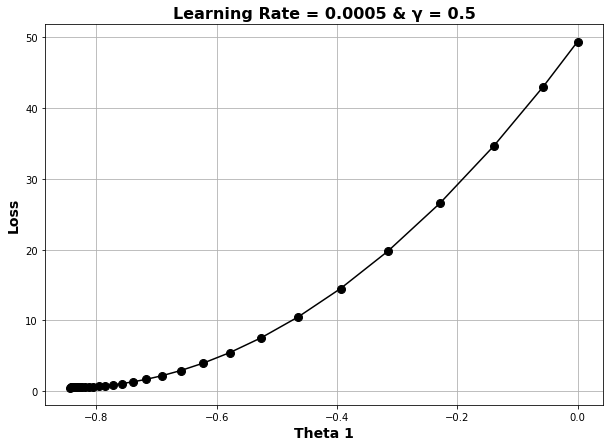

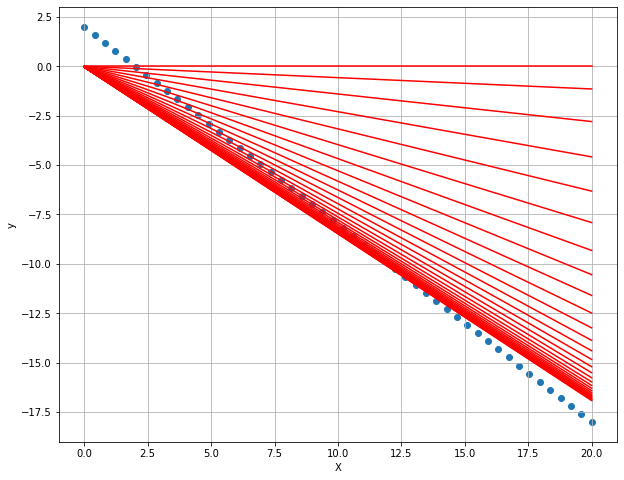

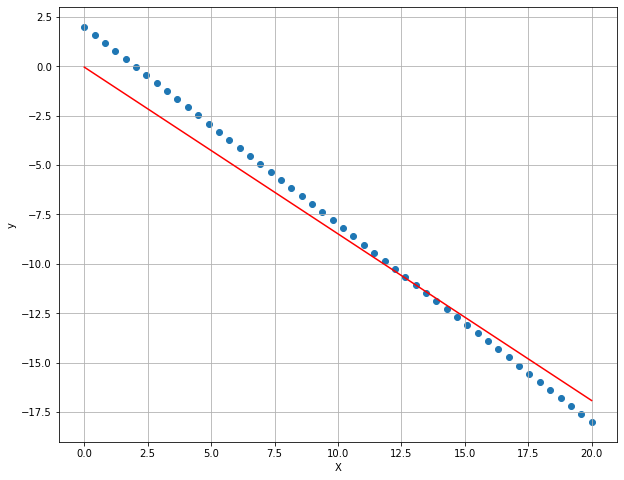

In [15]:
#DR_SOL

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [27]:
# GAMMA=1
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_MOMENTUM(X, y, 0.0005,300,1)


###########iteration== 0 #######################
j== 49.34693877551021
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
j== 42.96137982976481
gradient_vector [  7.42253061 106.929596  ]
gradient_vector_norm 114.35212661391087

###########iteration== 2 #######################
j== 31.8906324923875
gradient_vector [ 6.30670198 91.92682084]
gradient_vector_norm 98.23352282321143

###########iteration== 3 #######################
j== 19.082646914552008
gradient_vector [ 4.72808589 70.7015222 ]
gradient_vector_norm 75.42960809219574

###########iteration== 4 #######################
j== 7.94794444827706
gradient_vector [ 2.79359815 44.69105204]
gradient_vector_norm 47.484650190747296

###########iteration== 5 #######################
j== 1.4514313742961924
gradient_vector [ 0.63425835 15.65680835]
gradient_vector_norm 16.291066693579513

###########iteration== 6 #######################
j== 1.322875303213284
gr

In [28]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.8004427054418585

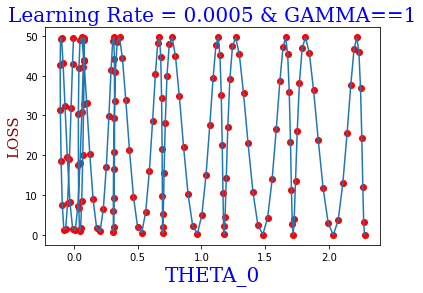

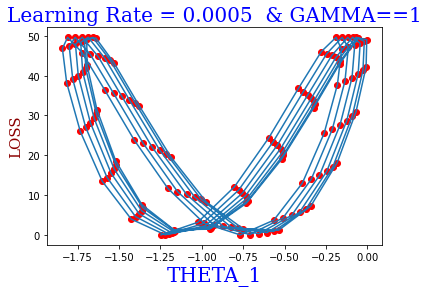

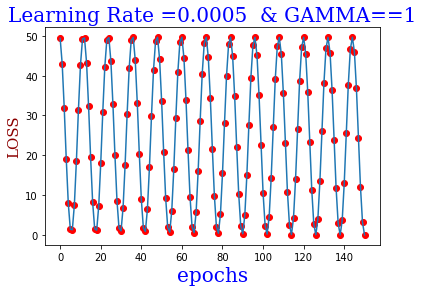

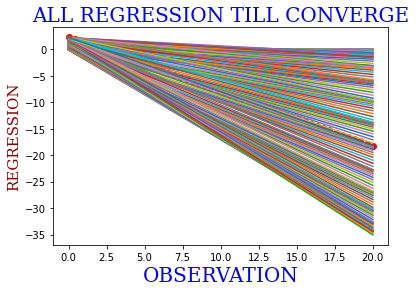

In [30]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0005 & GAMMA==1")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005  & GAMMA==1")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate =0.0005  & GAMMA==1")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   


In [31]:
# GAMMA=0
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_MOMENTUM(X, y, 0.0005,300,0)


###########iteration== 0 #######################
j== 49.34693877551021
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
j== 42.96137982976481
gradient_vector [  7.42253061 106.929596  ]
gradient_vector_norm 114.35212661391087

###########iteration== 2 #######################
j== 37.41136489517327
gradient_vector [ 6.88417137 99.69110239]
gradient_vector_norm 106.57527376032097

###########iteration== 3 #######################
j== 32.5875614778742
gradient_vector [ 6.38227377 92.94279097]
gradient_vector_norm 99.3250647364851

###########iteration== 4 #######################
j== 28.39494344557049
gradient_vector [ 5.91436868 86.65146715]
gradient_vector_norm 92.56583582302466

###########iteration== 5 #######################
j== 24.75091901332746
gradient_vector [ 5.47815416 80.78618425]
gradient_vector_norm 86.26433840691693

###########iteration== 6 #######################
j== 21.583703685935138
grad

In [32]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9690064856964327

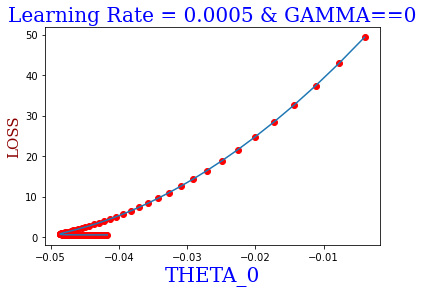

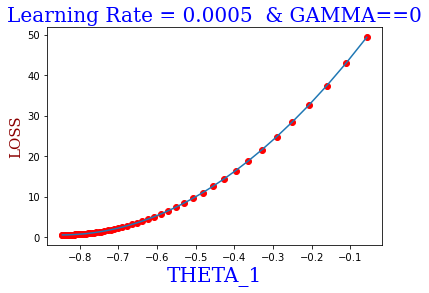

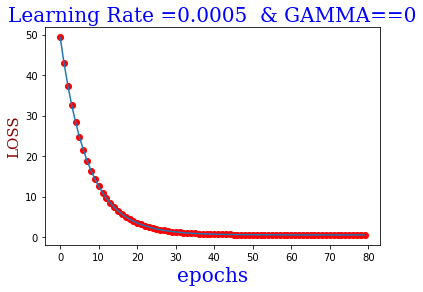

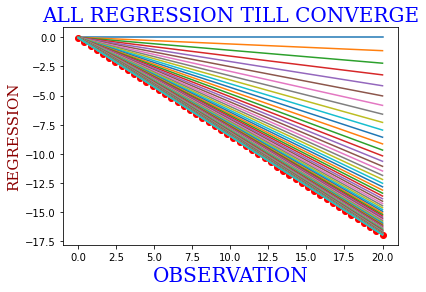

In [33]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0005 & GAMMA==0")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005  & GAMMA==0")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate =0.0005  & GAMMA==0")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   


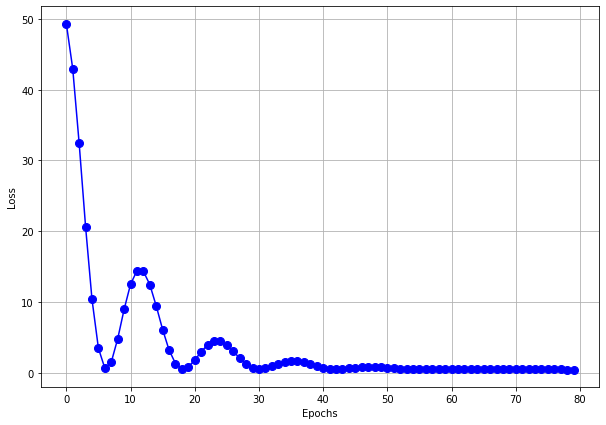

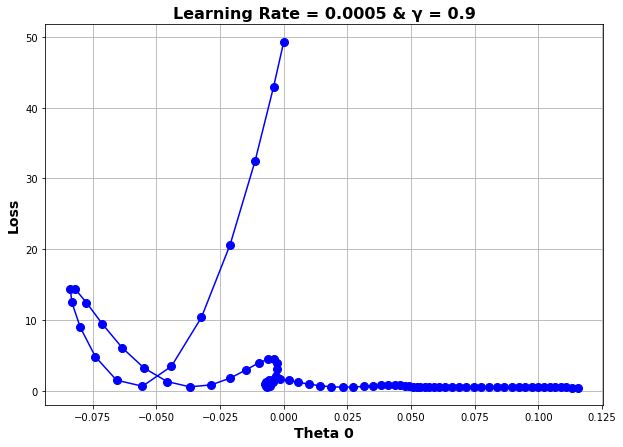

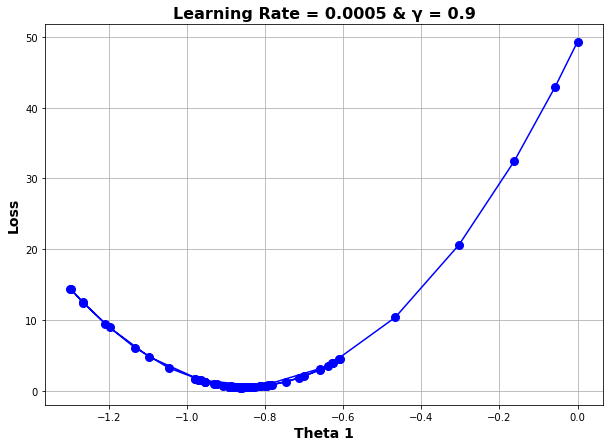

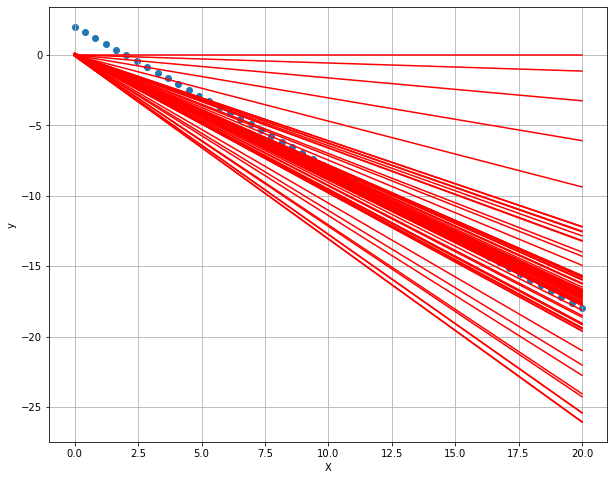

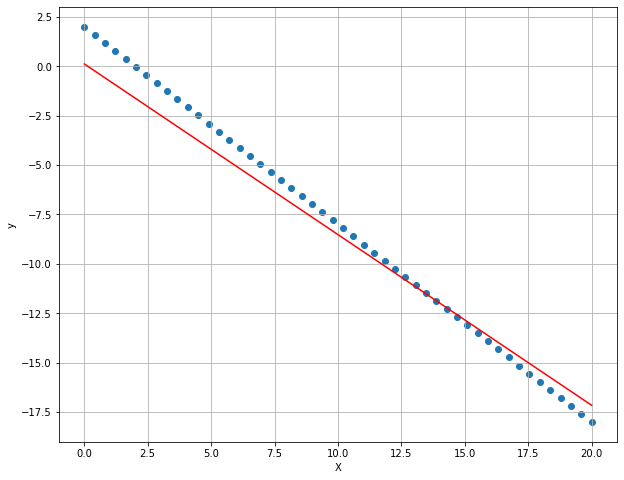

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

r2 score =  0.972435565060376


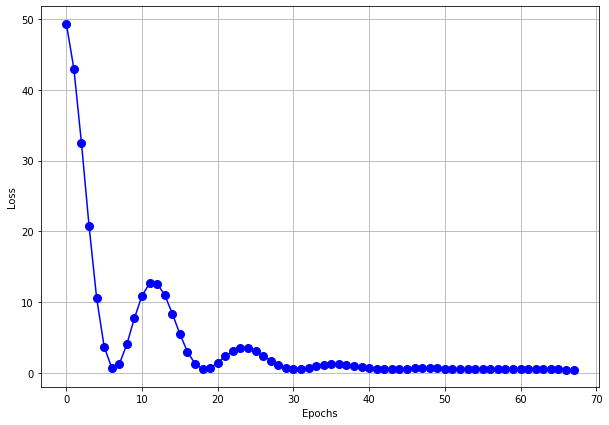

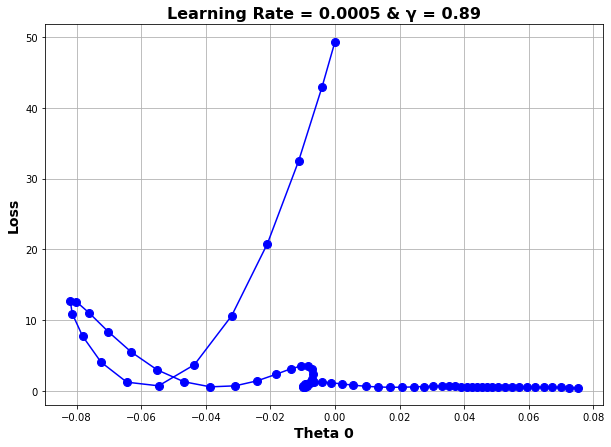

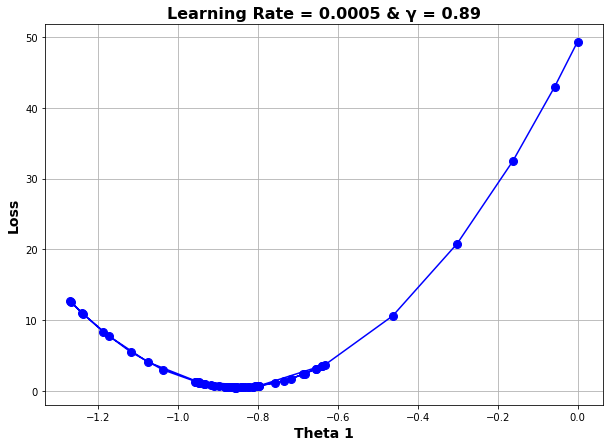

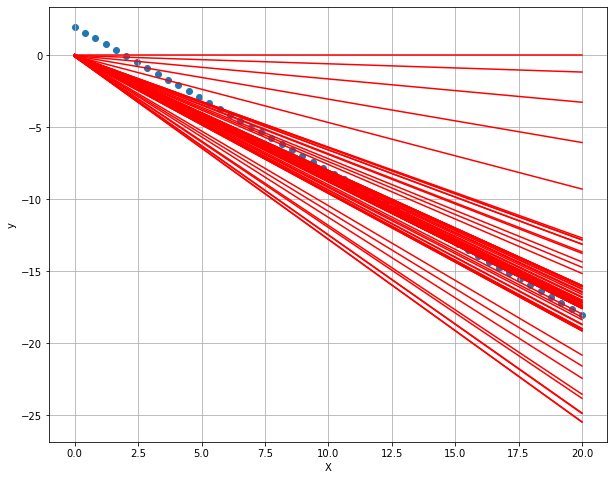

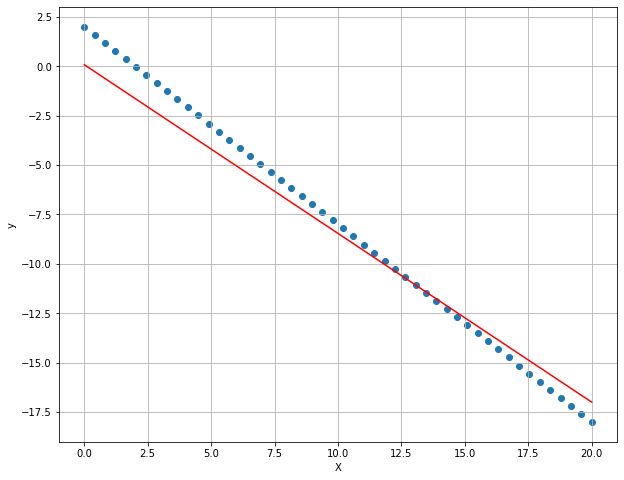

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [22]:
def GD_WITH_NAG(Input, Target, Learning_rate, iteration,gamma):
    # iterate 1000 times to get minimum loss fun 
    theta_0 =0
    theta_1 =0
    v_t0=0 # for momentum ||theta_0
    v_t1=0 # for momentum ||theta_1
    # FOR TEMP WEIGHTS
    theta0_temp ,theta1_temp =0,0
    #
    lr=Learning_rate
    X = Input
    y = Target
    m = len(X)
    # THE OUTPUT 
    cost_lst = []
    theta0_all=[]
    theta1_all=[]
    h_x_all=[]
    itert=0

    for i in range (iteration):
        # general function of the model of LR
        h_x = theta_0 + X*theta_1
        # HYPOTHIS FUNCTION FOR TEMP WEIGHT 
        h_temp = theta0_temp + theta1_temp * X
        # error = predicted -actual
        error = h_x - y   # FOR MAIN FUNCTION
        error_TEMP = h_temp - y # FOR TEMP HYPOTHIS
        # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
        MSA = error @ error / (2 * m)
        cost_lst.append(MSA)
        
        # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
        d_theta_0 = (sum(error)/m) # dj/d theta_0 = segma(error) /m 
        d_theta_1 = (error@X) /m   #dj/d theta_1 = segma(error)*X /m
        # GRADIENTS OF TEMP WEIGHTS 
        d_theta0_temp = (sum(error_TEMP)/m) # dj/d theta_0 = segma(error) /m 
        d_theta1_temp = (error_TEMP@X) /m   #dj/d theta_1 = segma(error)*X /m
        # update the weights
        # use momentum || for theta_0
        theta0_temp = theta0_temp - gamma*v_t0
        theta_0 = theta0_temp - lr*d_theta0_temp
        v_t0 = gamma*v_t0 + lr*d_theta0_temp

        # use momentum || for theta_1
        theta1_temp = theta1_temp - gamma*v_t1
        theta_1 = theta1_temp - lr*d_theta1_temp
        v_t1 = gamma*v_t1 + lr*d_theta1_temp
        
        # append in theta0 and theta1 lists 
        theta0_all.append(theta_0)
        theta1_all.append(theta_1)
        h_x_all.append(h_x)
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)
        if i<20 or i>990:
            print("\n###########iteration==",i,"#######################")
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (cost_lst[i] -cost_lst[i-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break


    return(theta0_all, theta1_all, h_x_all,cost_lst, theta_0, theta_1)
    


##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [23]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_NAG(X, y, 0.0005,300,0.9)


###########iteration== 0 #######################
j== 49.34693877551021
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
j== 42.96137982976481
gradient_vector [  7.42253061 106.929596  ]
gradient_vector_norm 114.35212661391087

###########iteration== 2 #######################
j== 37.59704712464297
gradient_vector [ 6.90280816 99.94174261]
gradient_vector_norm 106.8445507705123

###########iteration== 3 #######################
j== 28.708753539260883
gradient_vector [ 5.95053464 87.1380303 ]
gradient_vector_norm 93.08856494322265

###########iteration== 4 #######################
j== 18.471033921585917
gradient_vector [ 4.64064436 69.52593322]
gradient_vector_norm 74.16657757808191

###########iteration== 5 #######################
j== 9.216704025695188
gradient_vector [ 3.06694423 48.3666368 ]
gradient_vector_norm 51.433581033861834

###########iteration== 6 #######################
j== 2.875514815254842
g

In [24]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9725062859306385

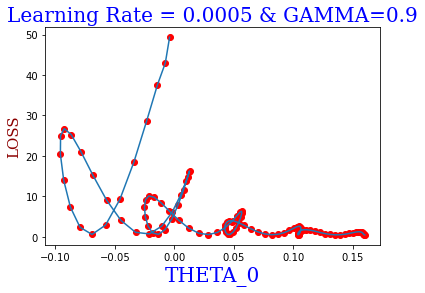

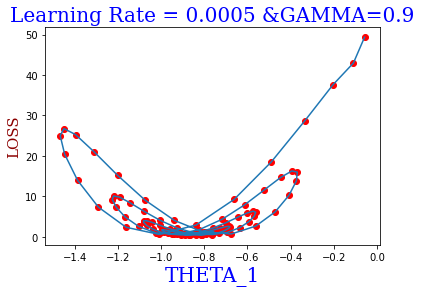

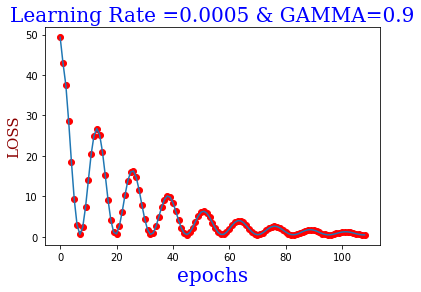

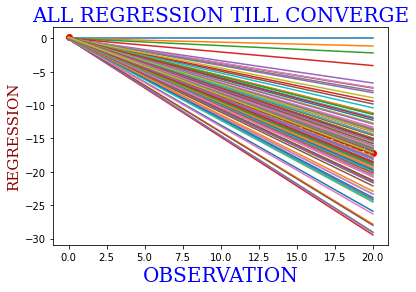

In [26]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate = 0.0005 & GAMMA=0.9")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate = 0.0005 &GAMMA=0.9")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate =0.0005 & GAMMA=0.9")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   


In [22]:
#DR_SOL

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

r2_score 0.971103130756324


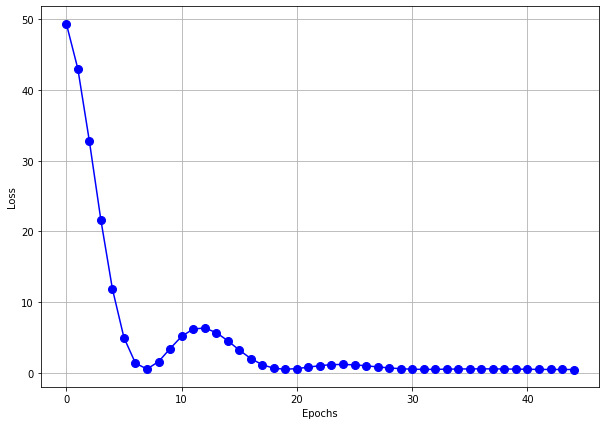

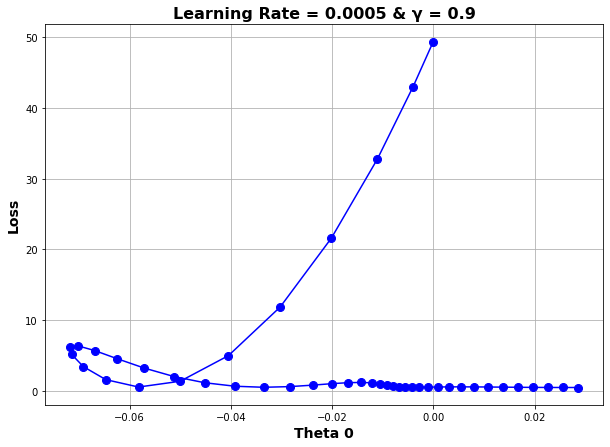

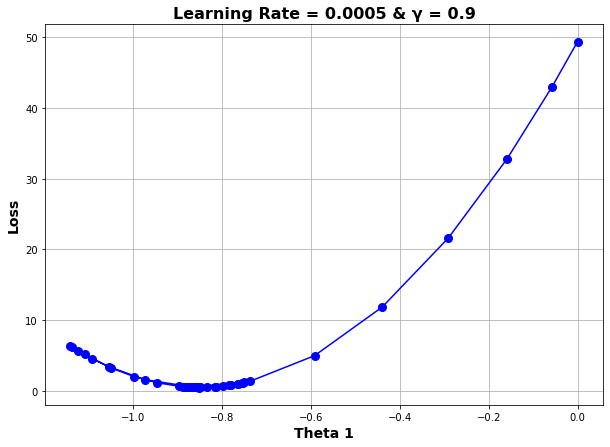

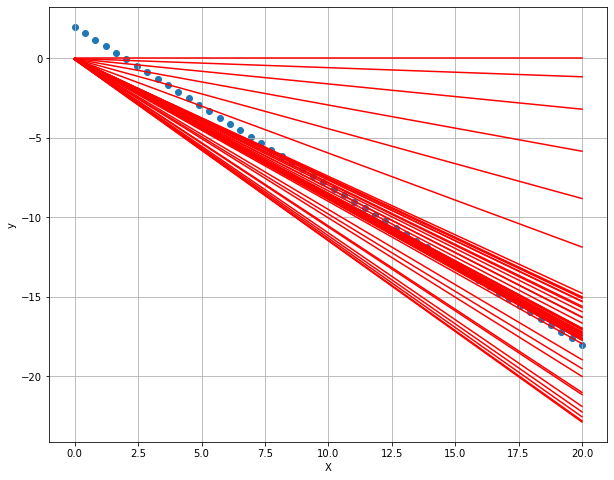

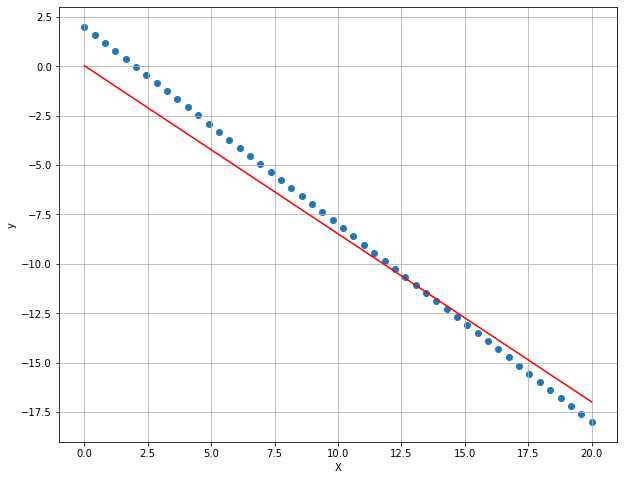

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

r2 score =  0.9699718983158406


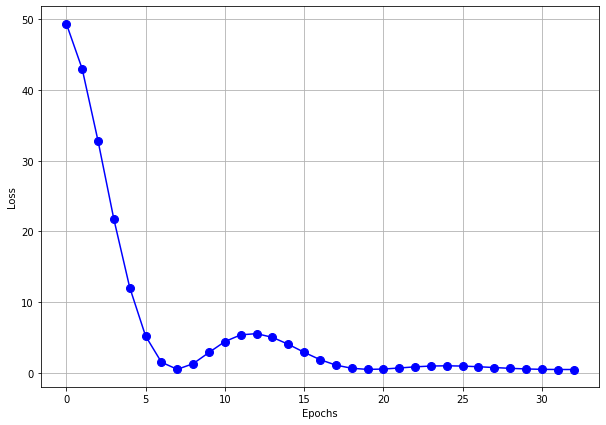

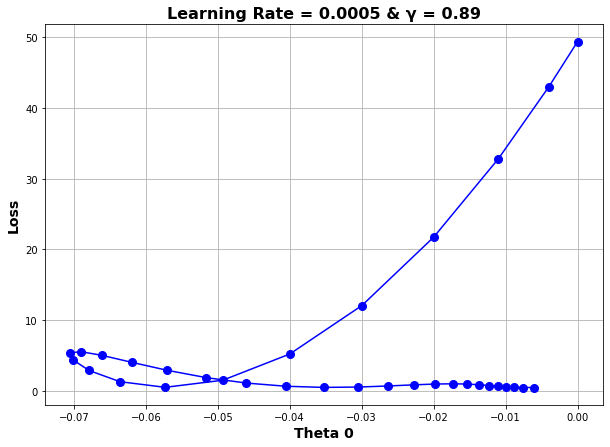

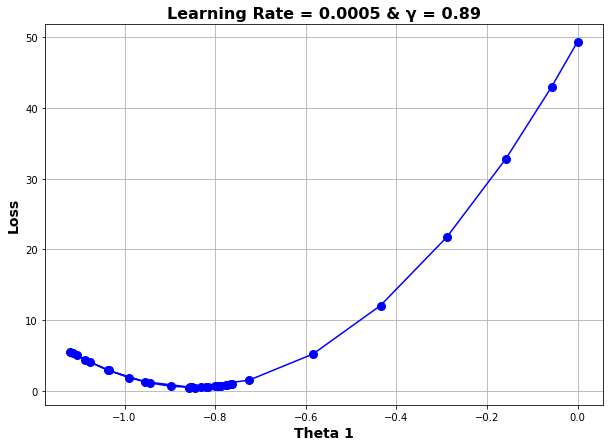

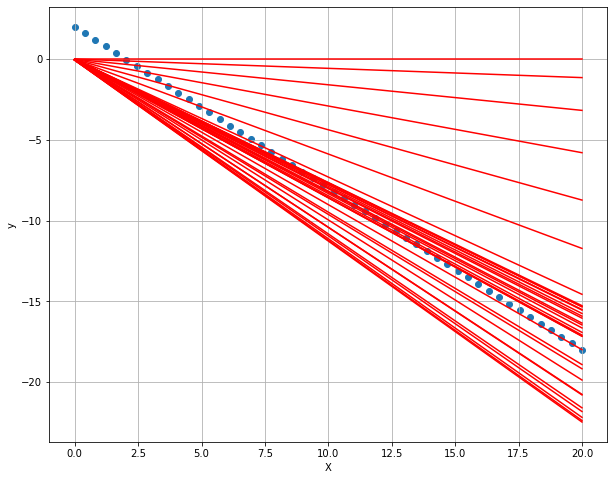

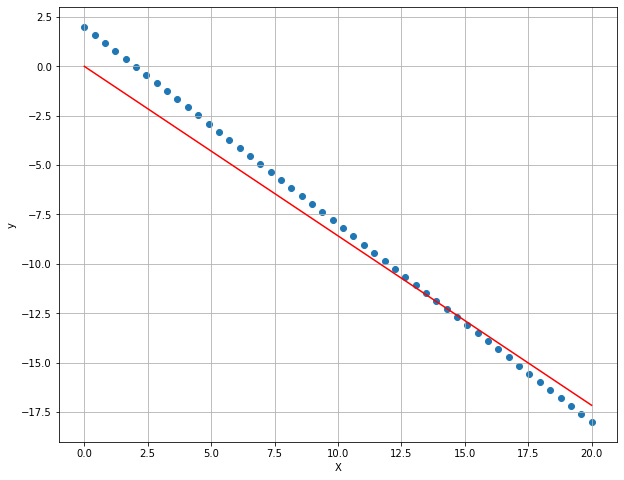